## I. Introduction
As the final component of the Introduction to Programming course, students are required to complete a project in which they work with a selected dataset to apply machine learning (ML) algorithms using the programming skills they have developed.

The selected approach for the project, is to focus on the applicability of ML to financial processes, in particular to the role that they can have in adjusting the decision-making in lending. The authors have, thus, selected a dataset containing qualitative data on past loan applications and aim at two main objectives:
1. To **analyze** and **process** the customer data contained in the set.
2. To **train three ML models** to relate the variables within the dataset, for a prediction on whether a new customer would be eligible for a loan. 

As a binary classification task, the goal is to classify the input data into an output of one of two mutually exclusive categories: ‘loan approval’ (Y) or ‘loan rejection’ (N). With these considerations, the three ML algorithms selected to be utilized are:
* *K*- Nearest Neighbor (***K*-NN**)
* Logistic Regression (**LR**)
* Decision Tree (**DT**)

The Analysis section that succeeds, includes a detailed description of the dataset retrieval and its contents, along with the results for each of the steps in the ML algorithm application. Furthermore, the report closes with its Conclusion section, containing a comparative summary of the findings.

## II. Analysis

### 1. Dataset
The dataset was offered, free of charge, by several users in the Kaggle platform and was easily found by the search query with the terms: ‘mortgage loan approval’; the exact address where it was collected can be accessed through the following link:
https://www.kaggle.com/datasets/burak3ergun/loan-data-set/data.

Before diving into the analytical steps of the data, it is worth highlighting the packages and settings utilized for the project:

In [9]:
# Packages and Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from my_functions import fill_missing_values, knn_varying_k
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.style.use('classic')

The initial step for the analysis was precisely the loading and exploration of the dataset.

In [11]:
# DATA LOADING
raw_url = "https://raw.githubusercontent.com/your_username/your_repository/main/loan_data_set.csv"
data = pd.read_csv(raw_url)

# View dataset observations and columns outcome variable (Loan_status)
display(data.info())
display(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### 1. Data Preparation
As observed, the dataset was originally distributed into 614 observations (rows) for 13 different variables (columns), which are summarized below:

| No. |  Variable Name   |               Description              |    Type     |         Sample          |
|:---:|:-----------------:|:--------------------------------------:|:-----------:|:-----------------------:|
|1    | Loan_ID           | ID for each loan                       | unique      | LP001002                |
|2    | Gender            | Applicant's gender                     | categorical | Male, Female            |
|3    | Married           | Applicant's marital status             | categorical | Yes, No                 |
|4    | Dependents        | Number of family members               | continuous  | 0, 1, 2, 3+             |
|5    | Education         | Applicant's education                  | categorical | Graduate / Not Graduate |
|6    | Self_Employed     | Applicant's condition of self-employed | categorical | Yes, No                 |
|7    | ApplicantIncome   | Applicant's monthly income (in USD)    | continuous  | 5417                    |
|8    | CoapplicantIncome | Coapplicant's monthly income (in USD)  | continuous  | 4196                    |
|9    | LoanAmount        | Amount of loan (in USD thousand)       | continuous  | 267                     |
|10   | Loan_Amount_Term  | Term of loan repayment (in months)     | continuous  | 360                     |
|11   | Credit_History    | Record of Credit Score (Good or Bad)   | categorical | 0 (Bad), 1: (Good)      |
|12   | Property_Area     | Type of location of property           | categorical | Rural, Semiurban, Urban |
|13   | Loan_Status       | Status of loan approval                | categorical | Yes, No                 |

Accordingly, and in order to be able to analyze the information properly, the following steps were taken as preparatory measures.

#### a. Data Cleaning
- Adjusted missing values:<br>
*As there were columns missing only a small number of null values, the authors decided to use mode and mean to replace missing categorical and numerical values, respectively.
Speciifically, mode for Gender, Married, Dependents, Self_Employed, and Credit_History; and mean for LoanAmount and Loan_Amount_Term.*
- Removed unnecessary columns:<br>
*Only Loan_ID was deemed unnecessary.*

#### b. Data Formatting
- Created dummies for categorical columns, while removing the first category to avoid multicollinearity
- Renamed the dummy columns for better clarity by removing specific suffixes
- Ensured that columns have desired names
- Removed outliers:<br> 
*Only the numeric columns were selected to calculate the Interquartile Range (IQR) and filter out potential outliers by removing rows where any numeric value fell outside 1.5 times the IQR.*
- Skewed distribution treatment:<br>
*A square root transformation to the ApplicantIncome, CoapplicantIncome, and LoanAmount columns was applied to reduce skewness in their distributions.*

#### c. Data Separation
- Separated the dataset into the target variable y (Loan_Status) and the input features X (all columns except Loan_Status).

#### d. Data Normalization
- Performed normalization to the range of independent variables (inputs) of data.

#### e. Data Splitting
- Split of data into 80% train and 20% test, with a defined random state 42 for replicability.

In [13]:
## DATA CLEANING
# Define the categorical and numerical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']

# Call from my_function to fill missing values
data = fill_missing_values(data, categorical_columns, numerical_columns)

# Remove unecessary columns
data = data.drop('Loan_ID', axis=1)

## DATA FORMATTING
# One-hot encoding (Creating dummies)
data = pd.get_dummies(data, drop_first=True)

# Rename columns for clarity
data.columns = data.columns.str.replace('_Male', '') \
                        .str.replace('_Yes', '') \
                        .str.replace('_Graduate', '') \
                        .str.replace('_Y', '')

# Final cleanup of specific columns to desired names
data.rename(columns={'Loan_Status': 'Loan_Status', 'Self_Employed': 'Self_Employed'}, inplace=True)

# REMOVING OUTLIERS AND SKEWED DISTRIBUTION TREATMENT
# Select only numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Calculate Q1, Q3, and IQR
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Apply the IQR filtering on the numeric data
data_filtered = data_numeric[~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

# Keep the non-numeric columns
data_non_numeric = data.select_dtypes(exclude=['float64', 'int64'])

# Rejoin the filtered numeric data with the non-numeric columns
data = data_filtered.join(data_non_numeric)

# Square Root Transformation
data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

# DATA SEPARATION
# Splitting Input and Output
y = data['Loan_Status'] # output variable
X = data.drop(['Loan_Status'], axis = 1)  # input variable

# DATA NORMALIZATION
# Numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Scale the numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Now X contains scaled numerical features and untransformed categorical features
display(X.head(5))

# DATA SPLITTING
# Splitting dataset 20% test 80 % training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed,Property_Area_Semiurban,Property_Area_Urban
0,1.014467,-1.106084,0.447644,0.0,0.0,True,False,False,False,False,False,False,False,True
1,0.394164,0.477856,0.063983,0.0,0.0,True,True,True,False,False,False,False,False,False
2,-0.518931,-1.106084,-1.492203,0.0,0.0,True,True,False,False,False,False,True,False,True
3,-0.797900,0.874576,-0.111293,0.0,0.0,True,True,False,False,False,True,False,False,True
4,1.083761,-1.106084,0.337506,0.0,0.0,True,False,False,False,False,False,False,False,True


## ML Algorithms

### *K*-Nearest Neighbor (***K*-NN**)
The authors chose to begin with *K*-NN because it is a simple, yet effective classification algorithm that makes no assumptions about the underlying data distribution, allowing it to perform well in several contexts. In addition, *K*-NN is intuitive and easy to implement as it classifies instances based on the majority class of nearest neighbors in the feature space, making it useful for multi-class problems and datasets with complex decision boundaries. <br>
The following operations were carried out through the corresponding *K*-NN ML programming:

#### a. Initialized an empty list to store accuracy (*k* values from 1 to 20).
#### b. Looped over values of *k* from 1 to 20.
#### c. Obtained the best accuracy achievedfromg all the tested *k* values.
#### d. Plotted the accuracy scores against *k* values.
#### e. Retrained *K*-NN with the best *k*-value.
#### f. Predicted on the test set using the best *k*-value.
#### g. Plotted a confusion matrix using seaborn's heatmap, displaying the classification performance of the *K*-NN model.

Best Accuracy score for K-NN:
85.90%


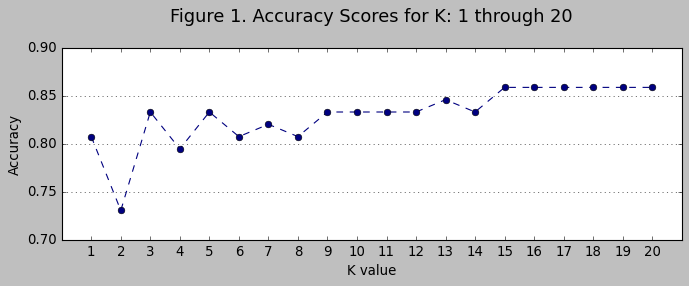

Best K value: 15



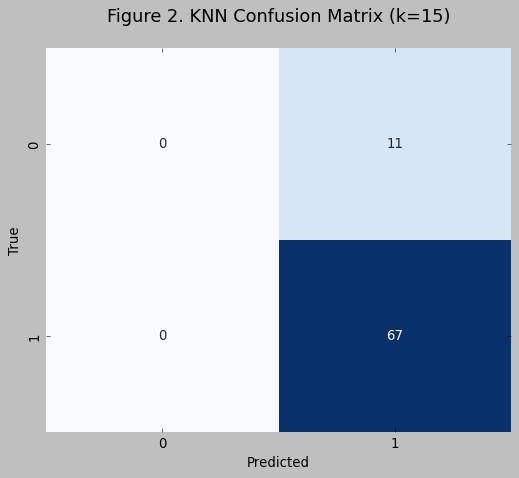

In [15]:
## K-NN
# Call the KNN function from my_functions to get accuracy scores for k values from 1 to 20
scores = knn_varying_k(X_train, y_train, X_test, y_test)

# Print the best scores for k
best_accuracy = max(scores)
print(f'Best Accuracy score for K-NN:\n{best_accuracy * 100:.2f}%')

# Plot K-NN scores
plt.figure(figsize=(10, 3))
plt.plot(range(1, 21), scores, color='navy', linestyle='--', marker='o')
plt.ylim(0.7,0.9)
plt.xlim(0,21)
plt.grid(axis = 'y')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.title('Figure 1. Accuracy Scores for K: 1 through 20\n', fontsize=16)
plt.show()

# Get the best k-value based on accuracy
best_k = scores.index(max(scores)) + 1  # Indexing starts from 0, so +1
print(f'Best K value: {best_k}\n')

# Re-train KNN with the best k-value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on the test set using the best k-value
y_pred_knn = knn_best.predict(X_test)

# Calculate and display the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix using seaborn's heatmap
plt.figure(figsize=(7.5, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Figure 2. KNN Confusion Matrix (k={best_k})\n', fontsize=16)
plt.show()

## ML Algorithms

### Logistic Regression**LR**)
LR was the first agreed upon method for this project among the authors, as it is a widely used algorithm for binary classification tasks and is considered to be simple, interpretable and effective for datasets with qualitative features. LR was also deemed a good choice because it handles multicollinearity well, which means that it can deal with cases where the input variables are highly correlated with each other, which can be the case in financial datasets. <br>
The following operations were carried out through the corresponding LR ML programming:
#### a. Initialized an LR model with no regularization (penalty) and an intercept, setting a maximum of 1000 optimization iterations.
#### b. Fitted (trained) the LR model, using the training data, on the relationship between the input features and the target variable.
#### c. Predicted outcomes for the test data.
#### d. Calculated an accuracy score to evaluate the LR model's performance on the proportion of correct predictions made on the test set.
#### e. Created a confusion matrix to examine how well the model classified true vs predicted labels (loan approval/rejection).
#### f. Plotted a visual version of the confusion matrix using a Seaborn’s heatmap, displaying the classification performance of the LR model.
#### g. Created an ROC curve, to show the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity).

Accuracy score for LR:
80.77%


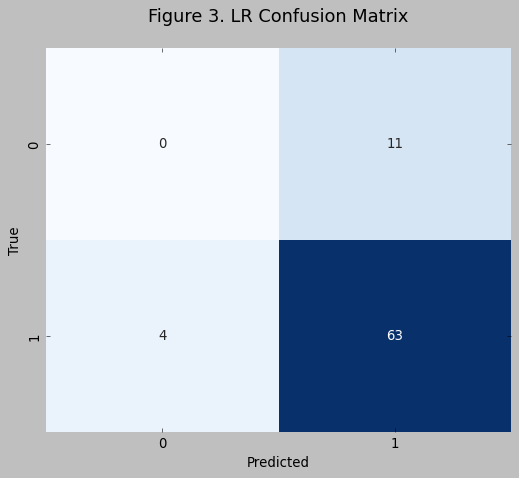

Area Under the Curve:
0.5237449118046134


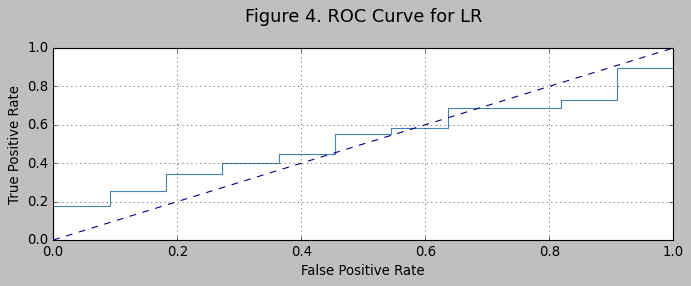

In [17]:
## LR
# Set up of logistic regression without penalty and including intercept
lr = LogisticRegression(penalty= None, fit_intercept=True, max_iter=1000)

# Fitted the model on training data
lr_fit = lr.fit(X_train, y_train)

# Prediction of outcomes
y_pred = lr_fit.predict(X_test)

# Accuracy and Precicion scores
lcaccuracy = accuracy_score(y_pred,y_test)
print(f'Accuracy score for LR:\n{lcaccuracy*100:.2f}%')

# Confusion Matrix Logistic Regression
confumat_lr = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn's heatmap
plt.figure(figsize=(7.5, 6))  
sns.heatmap(confumat_lr, annot=True, cmap='Blues', cbar = False, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Figure 3. LR Confusion Matrix\n', fontsize=16)
plt.show()

# Get probability estimates for positive class
y_prob = lr_fit.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Area Under the Curve
auc = roc_auc_score(y_test, y_prob)
print('Area Under the Curve:\n' + str(auc))

# Plotting ROC curve
plt.figure(figsize=(10, 3))
plt.plot(fpr, tpr, color='steelblue')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal reference line 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4. ROC Curve for LR\n', fontsize=16)
plt.grid()
plt.show()

### Decision Tree (**DT**)
As a final ML algorithm, the authors used a DT model, as they can handle both categorical and numerical data, making them popular for datasets with a mix of qualitative and quantitative features. This handling of non-linear relationships between variables was of particular interest, considering the flexibility for different data structures like the one being analyzed. Furthermore, DT models also provide interpretable results for the decision-making process that can be visualized, helping to understand how the loan approval or rejection decisions are made.<br>
The following operations were carried out through the corresponding DT ML programming:
#### a. Defined a DT classifier with a maximum depth of 10 to limit its complexity and a random state set to 42 for replicability.
#### b. Fitted (trained) the DT model on the training data to learn variable relationships that correlate with loan approval or rejection.
#### c. Predicted outcomes for the test data.
#### d. Calculated an accuracy score to evaluate the DT model’s performance on predicted values. 
#### e. Created a confusion matrix to compare how well the model is classified predicted and actual labels.
#### f. Saved the names of the features into a separate variable for the visualization of the DT.
#### g. Plotted the structure of the DT, specifying a maximum depth of 5 for clarity.

Accuracy score for DT:
75.64%


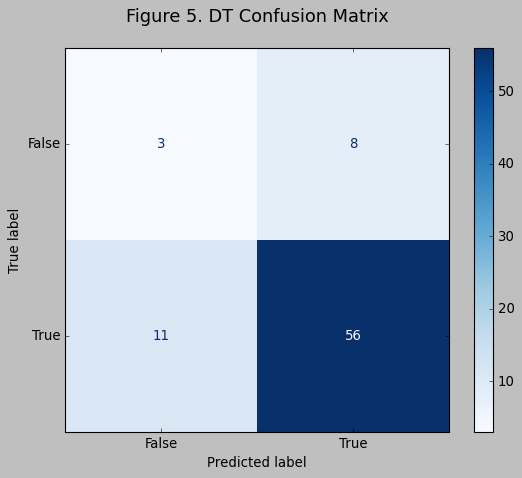

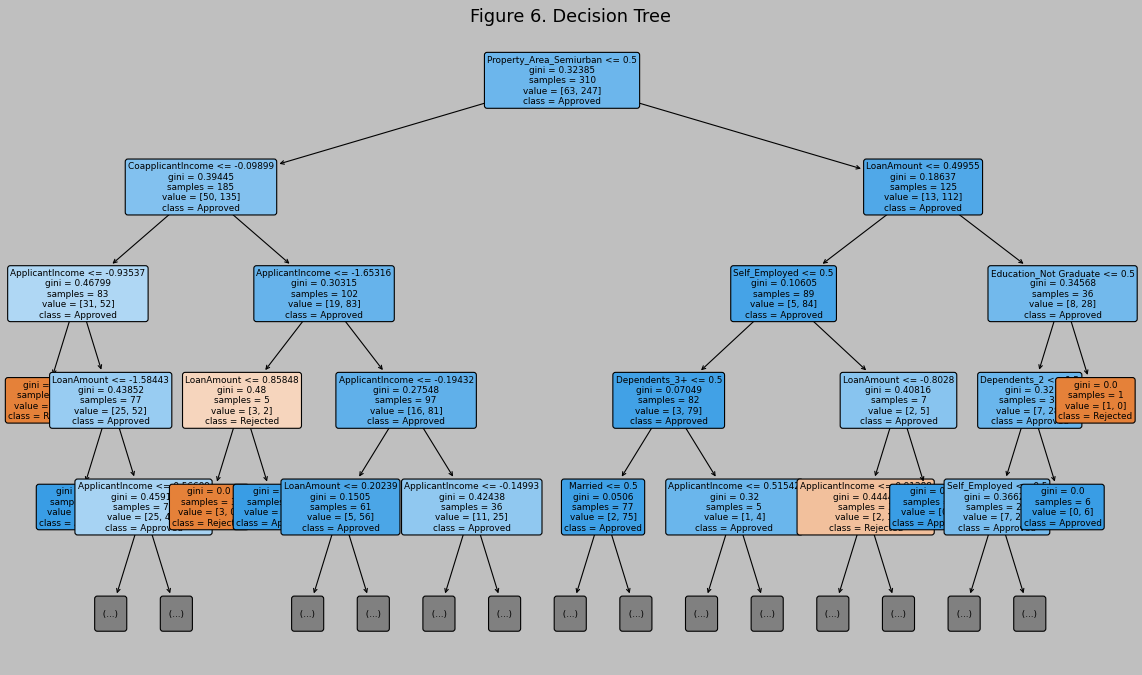

In [19]:
## DT
# Specifying the model, random_state 42 for reproducibility
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Learning from the training data 
clf.fit(X_train, y_train)

# Estimating predicted values for Y
y_pred = clf.predict(X_test)

# DT Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap = plt.cm.Blues)
disp.ax_.set_title('Figure 5. DT Confusion Matrix\n', fontsize=16)

# Comparing predictions with the test data 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score for DT:\n{accuracy * 100:.2f}%')

# Saving column names in seperate variable
feature_names = X.columns

# Plotting DT
plt.figure(figsize=(18, 10))
tree.plot_tree(clf, max_depth=4, feature_names=feature_names, class_names=['Rejected', 'Approved'], filled=True, 
               rounded=True, fontsize=8, precision=5)
plt.title('Figure 6. Decision Tree', fontsize=16)
plt.show()

## III. Conclusions
To summarize the results for the three ML algotithms, the following comparative Table 1. was constructed to inlcude the key metrics of accuracy and confusion matrices values accordingly.

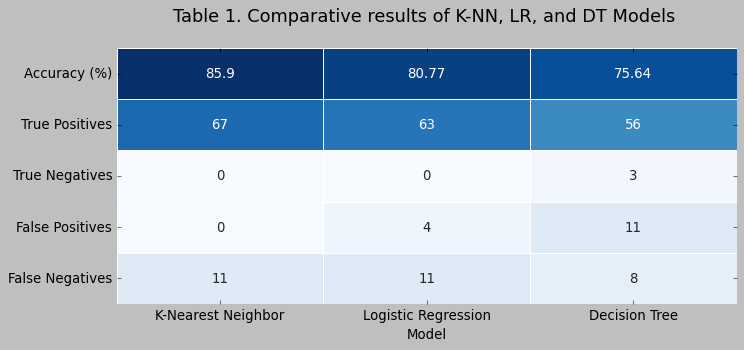

In [21]:
# Data for the comparison table
data = {
    'Model': ['K-Nearest Neighbor', 'Logistic Regression', 'Decision Tree'],
    'Accuracy (%)': [85.90, 80.77, 75.64],
    'True Positives': [67, 63, 56],
    'True Negatives': [0, 0, 3],
    'False Positives': [0, 4, 11],
    'False Negatives': [11, 11, 8]
}
comparison_df = pd.DataFrame(data)

# Plot table using seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(comparison_df.set_index('Model').T, annot=True, cmap='Blues', cbar=False, fmt='g', linewidths=0.5)
plt.title('Table 1. Comparative results of K-NN, LR, and DT Models \n', fontsize=16)
plt.show()

### 1. *K*-Nearest Neighbor (*K*-NN)
The *K*-NN method achieved a strong accuracy of 85.90%, which suggests that the model performs well in predicting loan approval outcomes. This indication is reinforced through the resulting confusion matrix values that show all the positive loan approvals were correctly predicted. A notable downside, however, is that the model misclassified all negative cases (11 false positives), meaning it struggles to identify rejection in loans, which could lead to approvals of loans that should be denied in a real-world scenario.

Given the strong accuracy, further *K*-NN ML analysis could focus on fine-tuning parameters, such as experimenting with different distance metrics or scaling techniques; or well, evaluating the model’s stability by cross-validation, ensuring it consistently performs well across different data splits. The focus should surely be placed on improving the model's ability to accurately predict negative outcomes, for reliability.

### 2. Logistic Regression (LR)
The LR model achieved an accuracy of 80.77%, indicating an adequate overall performance in predicting loan approvals. However, a low Area Under the ROC Curve of 0.52 (Figure. 4) suggests that the model's ability to distinguish loan rejection is only slightly better than flipping a coin.

To improve the overall performance, feature engineering would be necessary, particularly by adding interaction terms or using polynomial features to capture more complex relationships in the data. Two ideas to optimize the model are experimenting with regularization techniques, or using class weighting to emphasize the risk of incorrect classifications.

### 3. Decision Tree (DT)
The DT model achieved a moderate accuracy of 75.64% in predicting loan approvals. This ML method tended to classify more loan approvals correctly (56 correct classifications) than rejections, but it struggled with false positives and false negatives. The main strength of the ML model is its interpretability, offering insights into how the different features impact loan approval decisions.

A next step could be feature importance analysis, which would help identify the most influential factors in loan approval to aid decision-makers in a practical set-up. To improve the overall performance of the DT model, however, parameter tuning could be carried out by experimenting with different values of max_depth, min_samples_split, and min_samples_leaf for refining the tree structure, balance accuracy, and reduce overfitting.

Overall, the authors agree that much larger datasets would need to be processed in order to improve the quality of the algoritms applied; however, the project has provided a clear appreciation of the potential of programming ML algorithms for real-world applications.